In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
mergeddf_formodel = pd.read_csv('finaldfforml.csv')
#truncating data of interest. 2020 have covid 19 impacted disruption which is unreliable
mergeddf_trunc = mergeddf_formodel[mergeddf_formodel['Year'] <= 2018]

#Eliminating unreliable attribute
trunc_station_data = mergeddf_trunc[['Station','Category','Zone','WeekdayEnEx','SaturdayEnEx','SundayEnEx','TotalEnExCount','Year']]

trunc_station_data

,Station,Category,Zone,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
0,Acton Town,Metro,3,18071,12654,8797,5.75,2013
1,Acton Town,Metro,3,18797,13982,9768,6.06,2014
2,Acton Town,Metro,3,19401,14197,9972,6.24,2015
3,Acton Town,Metro,3,19575,13960,10106,6.27,2016
4,Acton Town,Metro,3,18913,18913,9529,5.73,2017
...,...,...,...,...,...,...,...,...
433,Wood Lane,Metro,2,12283,9951,6065,3.98,2014
434,Wood Lane,Metro,2,11534,9519,4836,3.70,2015
435,Wood Lane,Metro,2,11452,9234,5106,3.68,2016
436,Wood Lane,Metro,2,12873,12873,4761,3.80,2017


In [30]:
#correlation
co_matdf = mergeddf_trunc.corr()
co_matdf

,Zone,LineCount,TotPlatforms,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
Zone,1.000000e+00,-4.968162e-01,-4.646937e-01,-0.587030,-0.566429,-0.538913,-0.591469,-3.659956e-14
LineCount,-4.968162e-01,1.000000e+00,7.447782e-01,0.676830,0.568458,0.567875,0.663649,4.478296e-14
TotPlatforms,-4.646937e-01,7.447782e-01,1.000000e+00,0.580807,0.504690,0.473896,0.570578,4.307806e-14
WeekdayEnEx,-5.870297e-01,6.768302e-01,5.808068e-01,1.000000,0.901169,0.892087,0.994390,2.883825e-02
SaturdayEnEx,-5.664288e-01,5.684575e-01,5.046896e-01,0.901169,1.000000,0.948102,0.926697,6.275272e-02
SundayEnEx,-5.389127e-01,5.678755e-01,4.738963e-01,0.892087,0.948102,1.000000,0.929849,2.850315e-02
TotalEnExCount,-5.914693e-01,6.636485e-01,5.705778e-01,0.994390,0.926697,0.929849,1.000000,6.493548e-03
Year,-3.659956e-14,4.478296e-14,4.307806e-14,0.028838,0.062753,0.028503,0.006494,1.000000e+00


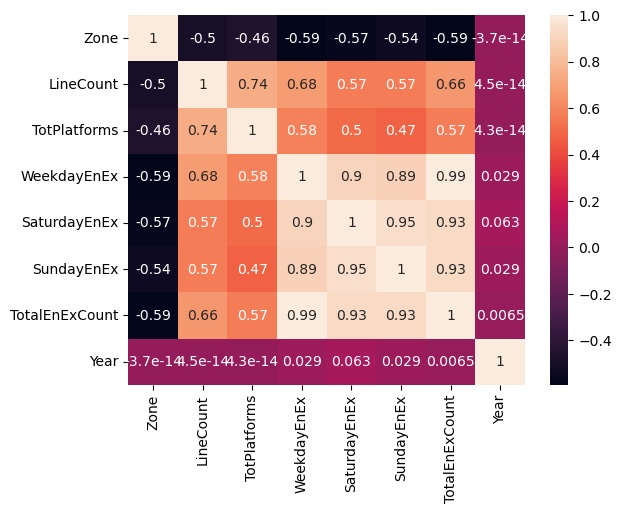

In [31]:
plt.figure()
sns.heatmap(co_matdf,annot=True)
plt.show()

In [32]:
#correlation
co2_matdf = trunc_station_data.corr()
co2_matdf

,Zone,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
Zone,1.000000e+00,-0.587030,-0.566429,-0.538913,-0.591469,-3.659956e-14
WeekdayEnEx,-5.870297e-01,1.000000,0.901169,0.892087,0.994390,2.883825e-02
SaturdayEnEx,-5.664288e-01,0.901169,1.000000,0.948102,0.926697,6.275272e-02
SundayEnEx,-5.389127e-01,0.892087,0.948102,1.000000,0.929849,2.850315e-02
TotalEnExCount,-5.914693e-01,0.994390,0.926697,0.929849,1.000000,6.493548e-03
Year,-3.659956e-14,0.028838,0.062753,0.028503,0.006494,1.000000e+00


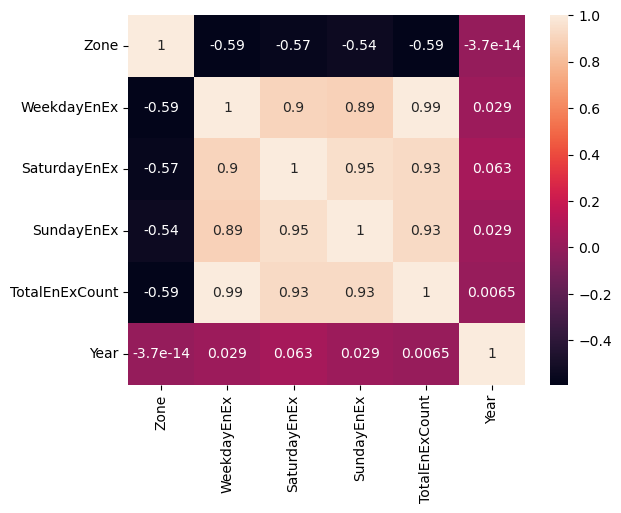

In [33]:
plt.figure()
sns.heatmap(co2_matdf,annot=True)
plt.show()

<Figure size 500x300 with 0 Axes>

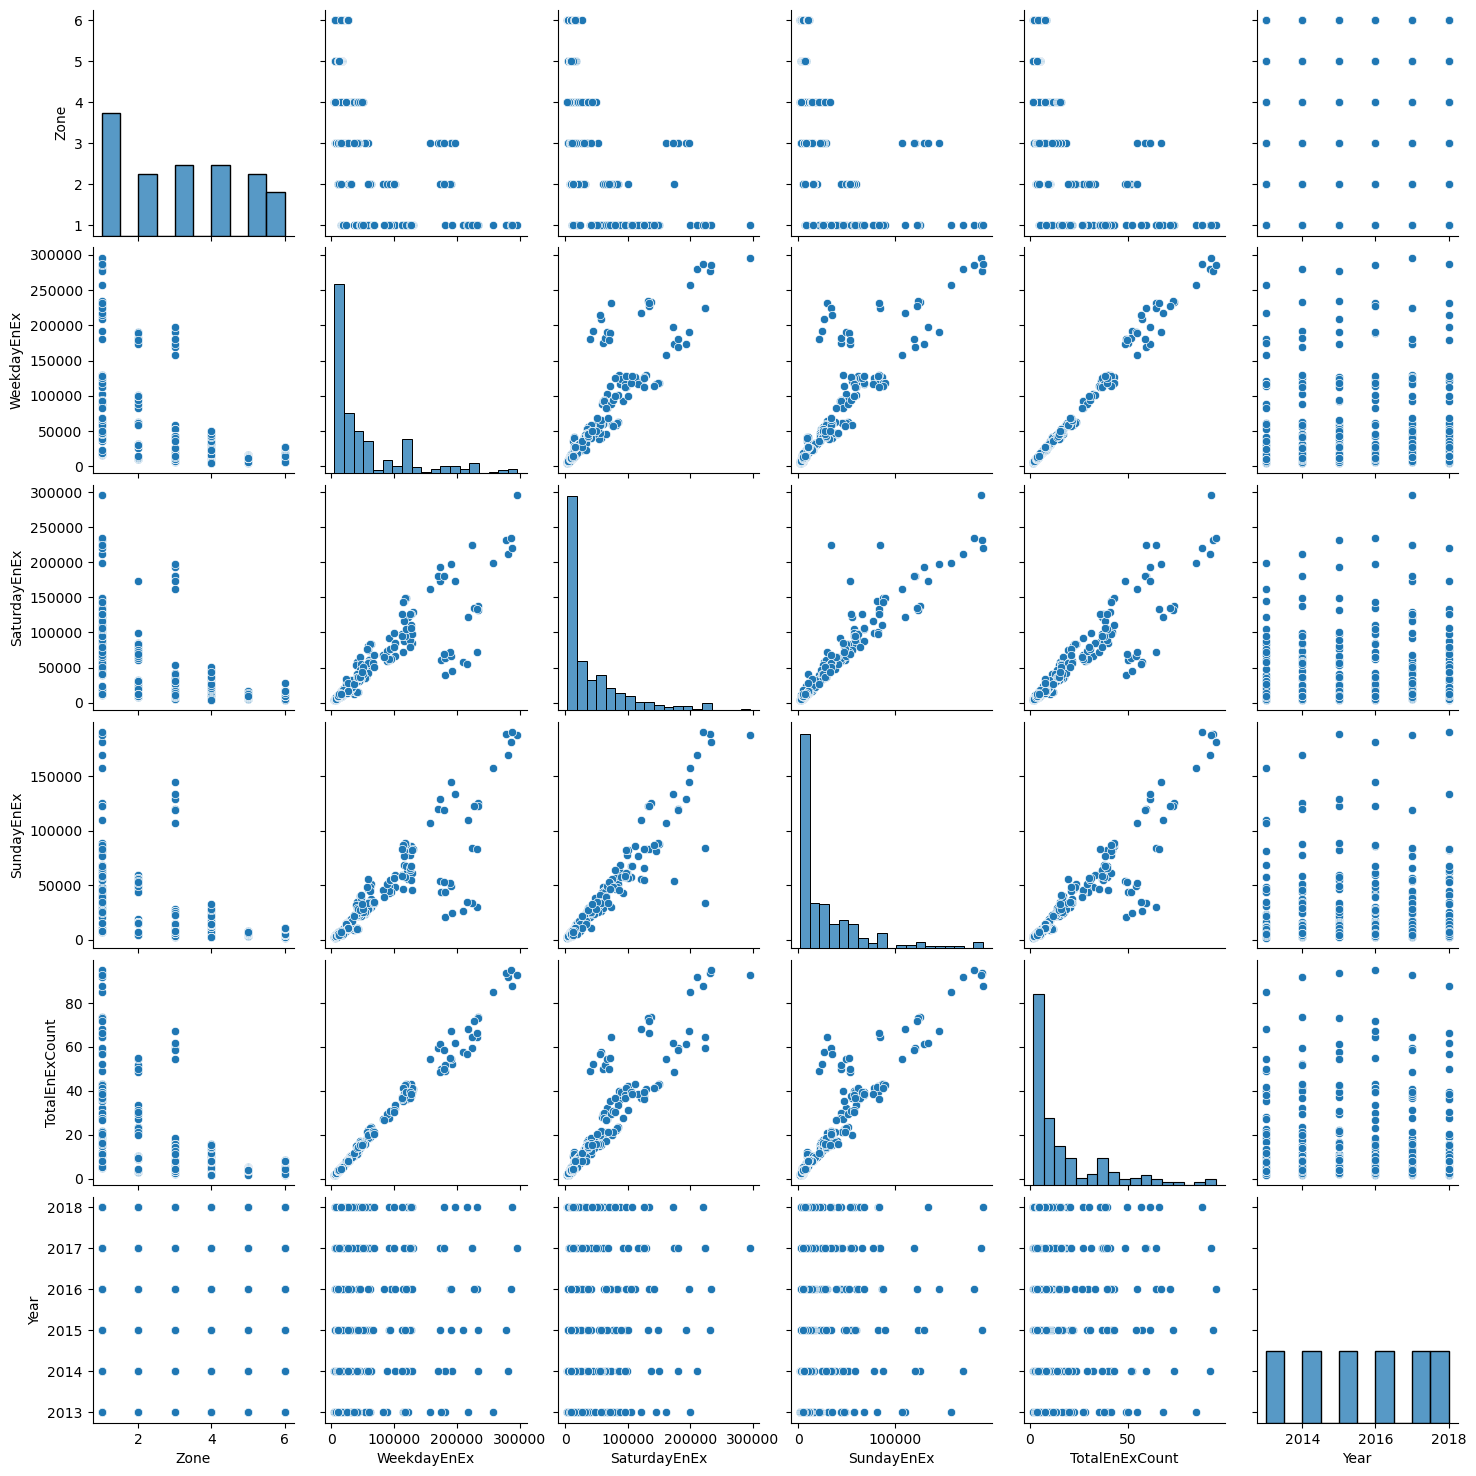

In [34]:
plt.figure(figsize=(5, 3))
sns.pairplot(trunc_station_data)
plt.show()

## Model

Mean Squared Error: 1.5739777912741182
R^2 Score: 0.9948819450315628


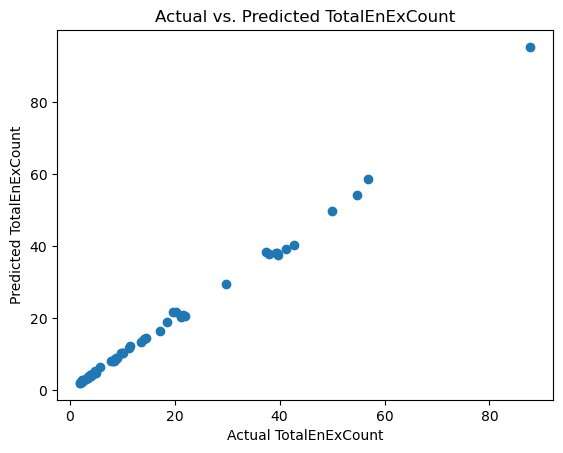

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Prepare data for regression
X = trunc_station_data[['Zone','WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx']]
y = trunc_station_data['TotalEnExCount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

# No box plot for 'Category' vs. 'TotalEnExCount' since 'Category' is not included in the model

#actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TotalEnExCount')
plt.ylabel('Predicted TotalEnExCount')
plt.title('Actual vs. Predicted TotalEnExCount')
plt.show()


### Model trial with category variable

Mean Squared Error: 1.477982787691169
R^2 Score: 0.9951940890197161


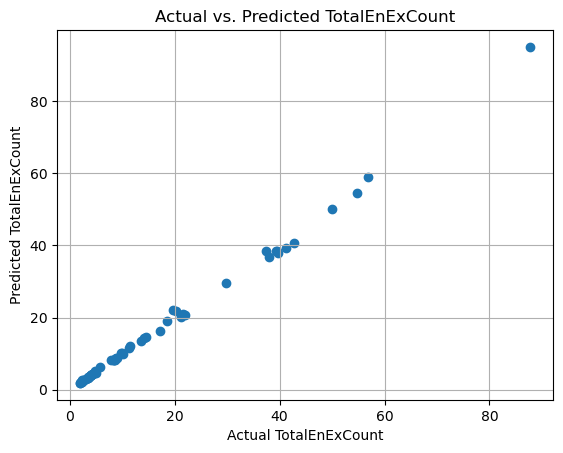

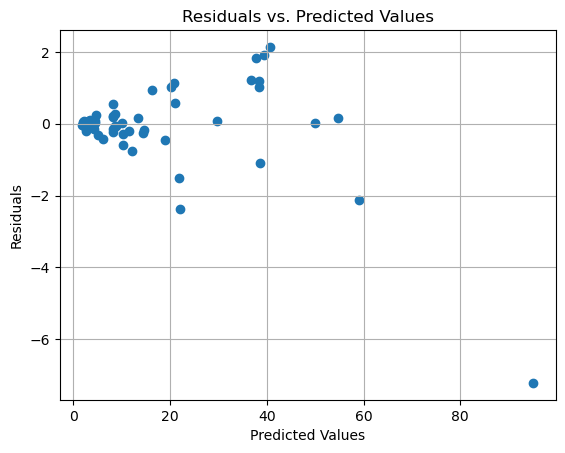

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# One-hot encode the 'Category' column
trunc_station_data_coded = pd.get_dummies(trunc_station_data, columns=['Category'])


# Prepare data for regression
X = trunc_station_data_coded[['Zone','WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'Category_Metro', 'Category_Local', 'Category_Destination', 'Category_Gateway']]
y = trunc_station_data_coded['TotalEnExCount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TotalEnExCount')
plt.ylabel('Predicted TotalEnExCount')
plt.title('Actual vs. Predicted TotalEnExCount')
plt.grid()
plt.show()

# Residual Analysis
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid()
plt.show()

In [37]:
# Make predictions for future data
new_data = pd.DataFrame({
    'Zone': [3], 
    'WeekdayEnEx': [20169],
    'SaturdayEnEx': [15162],
    'SundayEnEx': [10679],
    'Category_Metro': [1],
    'Category_Local': [0],
    'Category_Destination': [0],
    'Category_Gateway': [0]
})


X_future = new_data[['Zone', 'WeekdayEnEx', 'SaturdayEnEx', 'SundayEnEx', 'Category_Metro', 'Category_Local', 'Category_Destination', 'Category_Gateway']]

# Make predictions for the future data
y_future_pred = model.predict(X_future)

# Display the predicted values
print('Predicted TotalEnExCount for Future Data:', y_future_pred)

Predicted TotalEnExCount for Future Data: [6.42327674]


#### Real data for validating model with predicted

In [42]:
actual_selected_rows = mergeddf_formodel.query("Station == 'Acton Town' and Year == 2019")
actual_selected_rows

,Station,Category,Zone,LineCount,TotPlatforms,WeekdayEnEx,SaturdayEnEx,SundayEnEx,TotalEnExCount,Year
6,Acton Town,Metro,3,2,4,20169,15162,10679,6.19,2019


#### Trying out the model without day count features

Mean Squared Error: 98.45187305832899
R^2 Score: 0.6798670852590385


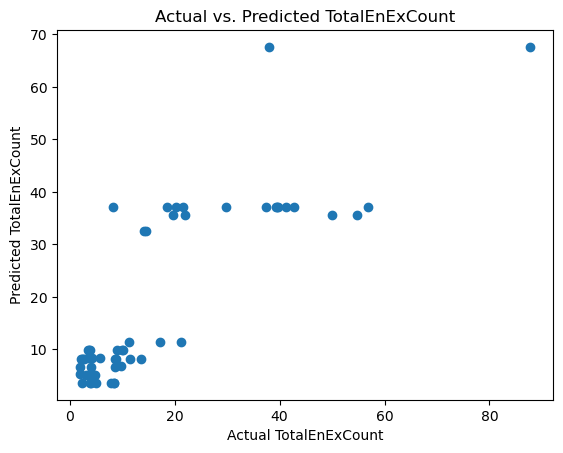

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# One-hot encode the 'Category' column
trunc_station_data_coded = pd.get_dummies(trunc_station_data, columns=['Category'])


# Prepare data for regression
X = trunc_station_data_coded[['Zone','Category_Metro', 'Category_Local', 'Category_Destination', 'Category_Gateway']]
y = trunc_station_data_coded['TotalEnExCount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))
#print('R^2 Score:', rmse(y_test, y_pred))

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TotalEnExCount')
plt.ylabel('Predicted TotalEnExCount')
plt.title('Actual vs. Predicted TotalEnExCount')
plt.show()
